In [34]:
import pandas as pd

In [10]:
first_data = pd.read_csv('./MainData AY 23-24 Oct 2023.csv')
first_data.head()

,Month,RowID,Response ID,"Overall, how satisfied are you with your experience living on campus at SDSU in the last 30 days?",Please explain why you are not satisfied with your experience living on campus at SDSU:,Front Desk,Wepa Printing Kiosk,Laundry Facilities,"Outdoor Recreation Facilities (pool, patio, fire pit, etc.)",The UPS Store,...,Country,Residency,RLC_Updated,RLC_GroupCoded,Coded_RoomType,Coded_ClassLevel,Classification,Gender,Type of Building,AttendStatus
0,October,101,R_Y3LSnMS91cFvTUZ,Satisfied,Did not answer,Yes,Yes,Yes,Yes,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Single,Junior,Returning,M,Sophomore and Upper Div,ATTENDING
1,October,677,R_1MSpOeErO1vMEno,Satisfied,Did not answer,Yes,No,Yes,Yes,Yes,...,India,Foreign,No Theme or Residential Learning/Living Community,No Learning Community,Single,Freshman,Continuing,M,Sophomore and Upper Div,ATTENDING
2,October,667,R_28zIRj9xXv5UT2p,Satisfied,Did not answer,Yes,Not Applicable,Yes,No,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Student Leader/Staff,Graduate,Graduate,F,Sophomore and Upper Div,ATTENDING
3,October,270,R_2CqOiVX3yrj9Rd4,Satisfied,Did not answer,Yes,Yes,Yes,Yes,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Student Leader/Staff,Senior,Returning,M,First Year,ATTENDING
4,October,341,R_3Jla1YNQA0hntPd,Satisfied,Did not answer,Not Applicable,Not Applicable,Yes,Not Applicable,Yes,...,United States of America,Out of State,No Theme or Residential Learning/Living Community,No Learning Community,Double,Sophomore,Returning,F,Sophomore and Upper Div,ATTENDING


In [4]:
first_data.columns

Index(['Month', 'RowID', 'Response ID',
       'Overall, how satisfied are you with your experience living on campus at SDSU in the last 30 days?',
       'Please explain why you are not satisfied with your experience living on campus at SDSU:',
       'Front Desk', 'Wepa Printing Kiosk', 'Laundry Facilities',
       'Outdoor Recreation Facilities (pool, patio, fire pit, etc.)',
       'The UPS Store', 'Streeme TV or Cable', 'WiFi',
       'Residential Bike Storage and Bike Racks', 'Surfboard Storage',
       'Community Study Areas', 'Community Kitchens', 'Vending Machines',
       'Have you utilized a STAR Center in the last 30 days?',
       'Please explain why you are not using the Star Center:',
       'Cleanliness of your residential community common areas (bathrooms, laundry rooms, hallways, lounges)',
       'Maintenance of your residential community (furniture, utilities, appliances)',
       'Amenities of your residential community (i.e., wifi, lounges, furniture, laundry, out

In [5]:
first_data["RowID"].value_counts()

RowID
211    1
101    1
677    1
667    1
270    1
      ..
578    1
199    1
684    1
441    1
202    1
Name: count, Length: 762, dtype: int64

<Axes: xlabel='How would you rate your mental health during the last 30 days?'>

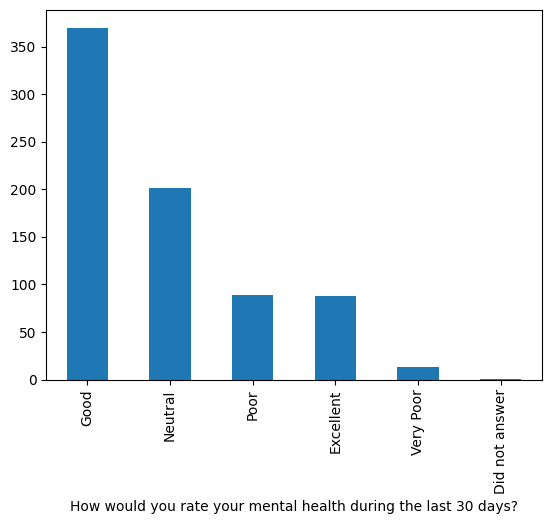

In [8]:
first_data["How would you rate your mental health during the last 30 days?"].value_counts().plot(kind='bar')

In [12]:
print(first_data["How would you rate your mental health during the last 30 days?"].value_counts())

How would you rate your mental health during the last 30 days?
Good              370
Neutral           201
Poor               89
Excellent          88
Very Poor          13
Did not answer      1
Name: count, dtype: int64


In [13]:
mental_health_map = {
    "Very Poor": 1,
    "Poor": 2,
    "Neutral": 3,
    "Good": 4,
    "Excellent": 5
}

In [14]:
first_data["mental_health_score"] = first_data["How would you rate your mental health during the last 30 days?"].map(mental_health_map)

In [15]:
print(first_data[["How would you rate your mental health during the last 30 days?", "mental_health_score"]].head(10))

  How would you rate your mental health during the last 30 days?  \
0                                               Good               
1                                               Poor               
2                                            Neutral               
3                                               Good               
4                                            Neutral               
5                                               Good               
6                                               Good               
7                                          Excellent               
8                                            Neutral               
9                                               Good               

   mental_health_score  
0                  4.0  
1                  2.0  
2                  3.0  
3                  4.0  
4                  3.0  
5                  4.0  
6                  4.0  
7                  5.0  
8                  3.0  
9

Second Column

In [18]:
print(first_data["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"].value_counts(dropna=False))

Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?
Did not answer                                                                                                                                                                                                                                                                674
No, I have my own therapist.                                                                                                                                                                                                                                                    2
No                                                                                                                                                                                                                                                                              2
Yes                                                              

In [22]:
def encode_cps_response(x):
    if pd.isnull(x):
        return None
    x = str(x).strip().lower()
    if "yes" in x:
        return 1
    return 0

first_data["reached_out_CPS"] = first_data["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"].apply(encode_cps_response)

In [23]:
print(first_data["reached_out_CPS"].value_counts(dropna=False))

reached_out_CPS
0    755
1      7
Name: count, dtype: int64


In [24]:
yes_responses = first_data[
    first_data["reached_out_CPS"] == 1
]["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"].unique()

print(yes_responses)


['yes' 'Yes' 'Yes I have' 'Yes I have.'
 'Yes, I attended 4 sessions but the counselor did not meet my needs.']


Third column

In [28]:
print(first_data["I avoid conflict or confrontation, so I don't address the issue."].value_counts(dropna=False))

I avoid conflict or confrontation, so I don't address the issue.
Disagree          359
Neutral           241
Agree             110
Did not answer     52
Name: count, dtype: int64


In [29]:
def encode_conflict_avoidance(x):
    if pd.isnull(x) or "not answer" in str(x).lower():
        return None
    x = x.strip().lower()
    if x == "agree":
        return 1
    elif x == "neutral":
        return 0.5
    elif x == "disagree":
        return 0
    else:
        return None 

first_data["conflict_avoidance"] = first_data["I avoid conflict or confrontation, so I don't address the issue."].apply(encode_conflict_avoidance)

print(first_data["conflict_avoidance"].value_counts(dropna=False))

conflict_avoidance
0.0    359
0.5    241
1.0    110
NaN     52
Name: count, dtype: int64


Fourth Column

In [30]:
print(first_data["Feeling a sense of belonging within the university community (Sense of belonging is the feeling that we have satisfied our emotional need to belong to a community or group because we feel accepted, included, respected, and supported by a group)"].value_counts(dropna=False))
print(first_data["Feeling a sense of belonging within the university community (Sense of belonging is the feeling that we have satisfied our emotional need to belong to a community or group because we feel accepted, included, respected, and supported by a group)"].unique())

Feeling a sense of belonging within the university community (Sense of belonging is the feeling that we have satisfied our emotional need to belong to a community or group because we feel accepted, included, respected, and supported by a group)
Agree             502
Neutral           191
Disagree           68
Did not answer      1
Name: count, dtype: int64
['Agree' 'Neutral' 'Disagree' 'Did not answer']


In [31]:
def encode_belonging(x):
    if pd.isnull(x) or "not answer" in str(x).lower():
        return None
    x = x.strip().lower()
    if x == "agree":
        return 1
    elif x == "neutral":
        return 0.5
    elif x == "disagree":
        return 0
    else:
        return None

first_data["sense_of_belonging"] = first_data["Feeling a sense of belonging within the university community (Sense of belonging is the feeling that we have satisfied our emotional need to belong to a community or group because we feel accepted, included, respected, and supported by a group)"].apply(encode_belonging)

print(first_data["sense_of_belonging"].value_counts(dropna=False))

sense_of_belonging
1.0    502
0.5    191
0.0     68
NaN      1
Name: count, dtype: int64


Fith Column

In [32]:
print(first_data["I have submitted a room switch request due to a roommate conflict"].value_counts(dropna=False))
print(first_data["I have submitted a room switch request due to a roommate conflict"].unique())

I have submitted a room switch request due to a roommate conflict
Disagree          616
Did not answer     51
Neutral            48
Agree              47
Name: count, dtype: int64
['Disagree' 'Did not answer' 'Agree' 'Neutral']


In [33]:
def encode_room_switch_request(x):
    if pd.isnull(x) or "not answer" in str(x).lower():
        return None
    x = x.strip().lower()
    if x == "agree":
        return 1
    elif x == "neutral":
        return 0.5
    elif x == "disagree":
        return 0
    else:
        return None

first_data["room_switch_request"] = first_data["I have submitted a room switch request due to a roommate conflict"].apply(encode_room_switch_request)
print(first_data["room_switch_request"].value_counts(dropna=False))

room_switch_request
0.0    616
NaN     51
0.5     48
1.0     47
Name: count, dtype: int64


Headmap

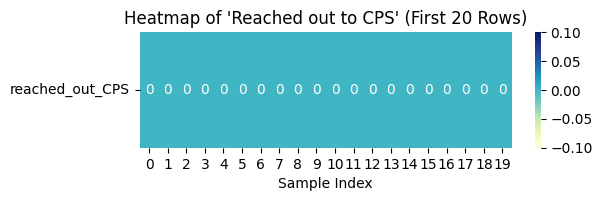

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 1.5))
sns.heatmap(first_data[["reached_out_CPS"]].head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of 'Reached out to CPS' (First 20 Rows)")
plt.xlabel("Sample Index")
plt.yticks([0.5], ['reached_out_CPS'], rotation=0)
plt.show()

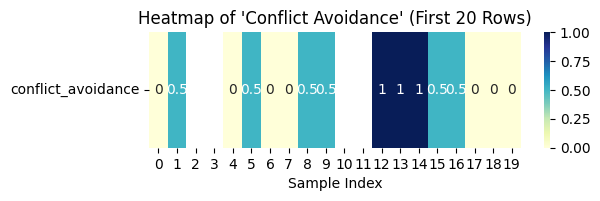

In [39]:
plt.figure(figsize=(6, 1.5))
sns.heatmap(first_data[["conflict_avoidance"]].head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of 'Conflict Avoidance' (First 20 Rows)")
plt.xlabel("Sample Index")
plt.yticks([0.5], ['conflict_avoidance'], rotation=0)
plt.show()

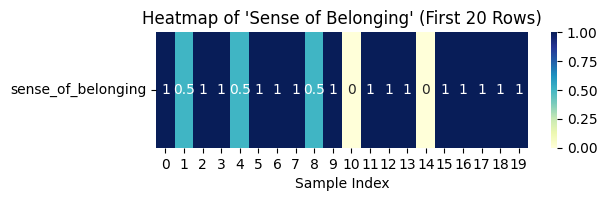

In [40]:
plt.figure(figsize=(6, 1.5))
sns.heatmap(first_data[["sense_of_belonging"]].head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of 'Sense of Belonging' (First 20 Rows)")
plt.xlabel("Sample Index")
plt.yticks([0.5], ['sense_of_belonging'], rotation=0)
plt.show()

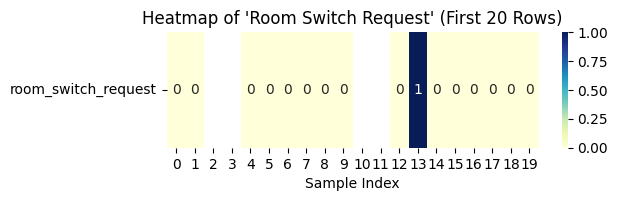

In [41]:
plt.figure(figsize=(6, 1.5))
sns.heatmap(first_data[["room_switch_request"]].head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of 'Room Switch Request' (First 20 Rows)")
plt.xlabel("Sample Index")
plt.yticks([0.5], ['room_switch_request'], rotation=0)
plt.show()

Get Dummies

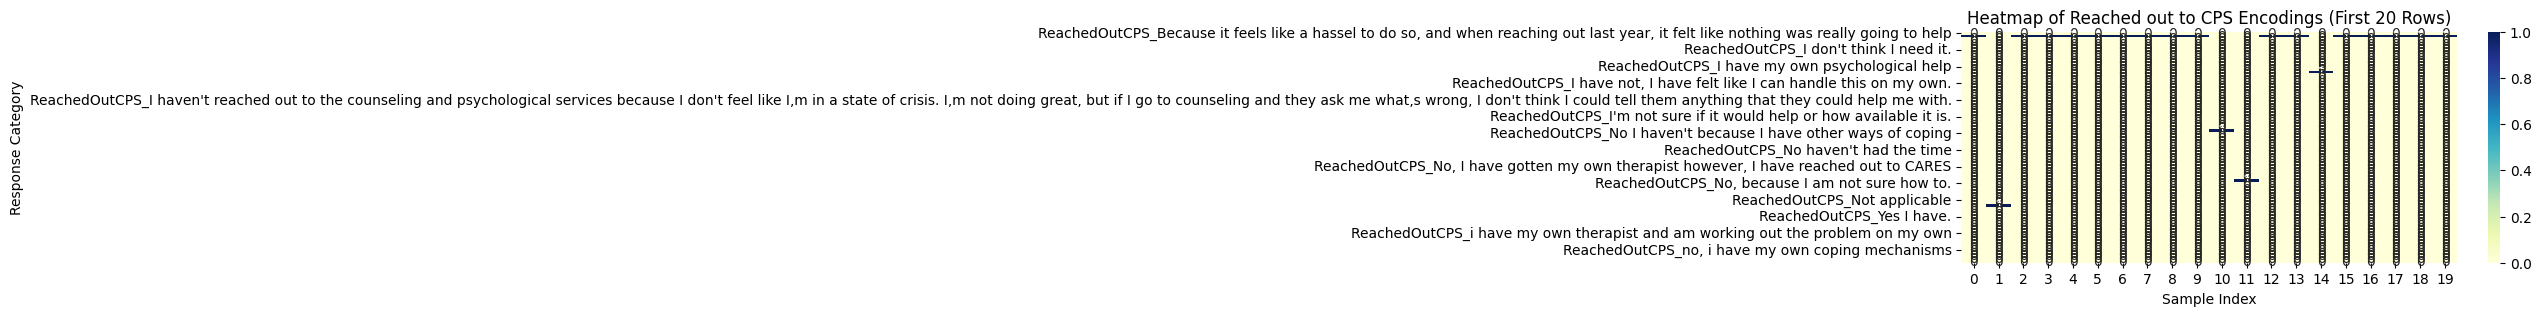

In [42]:
cps_dummies = pd.get_dummies(
    first_data["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"],
    prefix="ReachedOutCPS"
)

plt.figure(figsize=(8, 3))
sns.heatmap(cps_dummies.head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of Reached out to CPS Encodings (First 20 Rows)")
plt.xlabel("Sample Index")
plt.ylabel("Response Category")
plt.show()


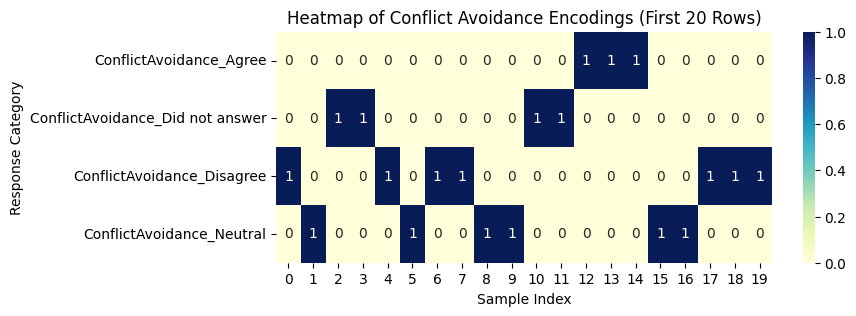

In [43]:
conflict_dummies = pd.get_dummies(
    first_data["I avoid conflict or confrontation, so I don't address the issue."],
    prefix="ConflictAvoidance"
)

plt.figure(figsize=(8, 3))
sns.heatmap(conflict_dummies.head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of Conflict Avoidance Encodings (First 20 Rows)")
plt.xlabel("Sample Index")
plt.ylabel("Response Category")
plt.show()


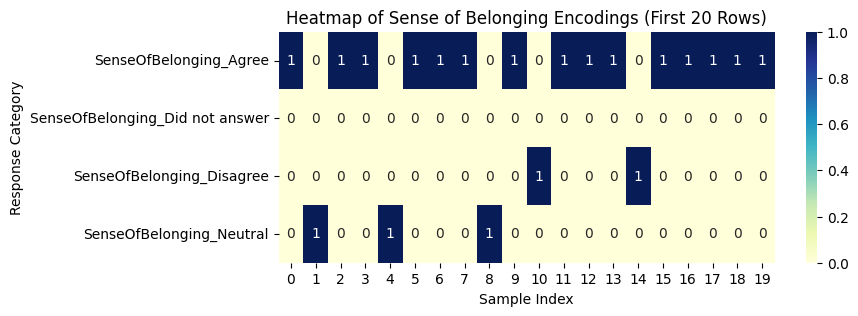

In [44]:
sense_dummies = pd.get_dummies(
    first_data["Feeling a sense of belonging within the university community (Sense of belonging is the feeling that we have satisfied our emotional need to belong to a community or group because we feel accepted, included, respected, and supported by a group)"],
    prefix="SenseOfBelonging"
)

plt.figure(figsize=(8, 3))
sns.heatmap(sense_dummies.head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of Sense of Belonging Encodings (First 20 Rows)")
plt.xlabel("Sample Index")
plt.ylabel("Response Category")
plt.show()


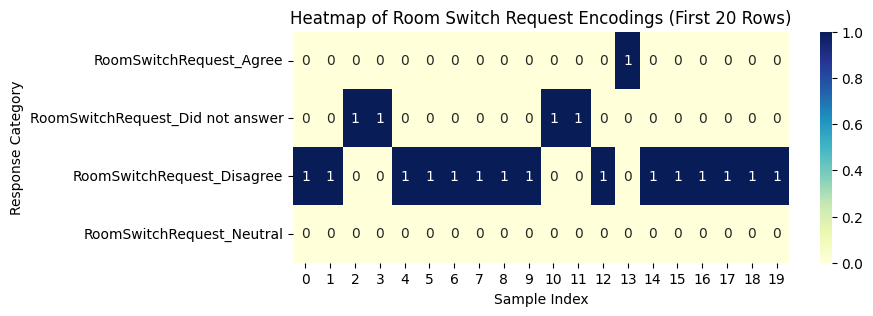

In [45]:
room_switch_dummies = pd.get_dummies(
    first_data["I have submitted a room switch request due to a roommate conflict"],
    prefix="RoomSwitchRequest"
)

plt.figure(figsize=(8, 3))
sns.heatmap(room_switch_dummies.head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of Room Switch Request Encodings (First 20 Rows)")
plt.xlabel("Sample Index")
plt.ylabel("Response Category")
plt.show()


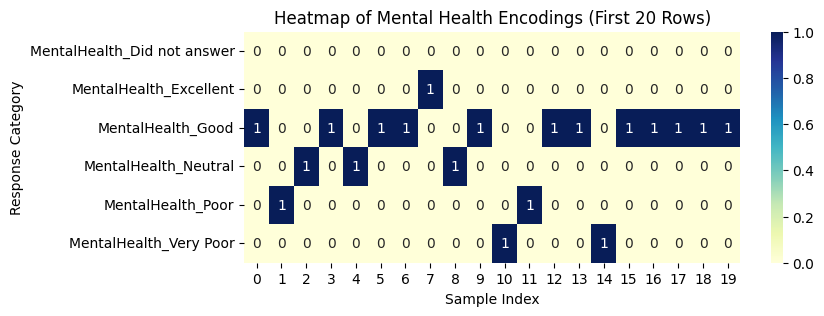

In [46]:
mental_health_dummies = pd.get_dummies(
    first_data["How would you rate your mental health during the last 30 days?"],
    prefix="MentalHealth"
)

plt.figure(figsize=(8, 3))
sns.heatmap(mental_health_dummies.head(20).T, annot=True, cbar=True, cmap="YlGnBu")
plt.title("Heatmap of Mental Health Encodings (First 20 Rows)")
plt.xlabel("Sample Index")
plt.ylabel("Response Category")
plt.show()
